---
title: "Embedding peptides, part 1: Simple embeddings"

date: 2025-06-30
date-modified: last-modified

author:

- name: Humberto Giraldez

  orcid:

  affiliations:
    - Biology Department, Brigham Young University, Provo, Utah 84602, United States

---

[![](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ProteomicsML/ProteomicsML/blob/main/tutorials/fragmentation/_nist-1-parsing-spectral-library.ipynb)


# Introduction

## Background

**Machine learning (ML) models are only as good as the data they receive.** In proteomics, peptide sequences are typically represented textually (e.g. `SAMPLER`). However, **ML requires inputs to  be numeric**. In order for ML to be able to use our data, we need to first convert the sequences into numeric representations-- **embeddings**.

Despite their importance, **embeddings are often overlooked in ML education**, which tends to focus on model architecture instead of data preparation.

In this mini course, you will learn learn the basics of proteomics embedding by looking at 5 different embedding methods; each methods is from a published manuscript. For each method, we will discuss strengths, limitations, and run code so you can see the methods first-hand. Finally, you will be able to compare performance of the methods to see how different embedding methods enable improved accuracy of an ML task.

- Part 1: Simple Embeddings
  * Single-number embeddings
  * Fractional amino acid composition
  * One-hot encoding

- Part 2: Complex Embeddings
  * Atomic composition

- Part 3: Learned Embeddings
  * ESM embeddings

- Part 4: Benchmarking Embedding
  * Comparing embeddings in predicting retention time


## Using this tutorial

This tutorial is designed to be interactive, and you are encouraged to change the code and explore. To do this, you'll need to save a copy of this so that you have editing permissions. Use `File->Save a copy in Drive` to make an editable copy for yourself. Colab notebooks consist of text cells (like this one) and code cells. You interact with the notebook by executing (running) the code cells by clicking the "play button" in each cell. You can also run all cells at once by using `Runtime->Run all`.


## What is an embedding?

When starting a machine learning project, the first task is to get the data formatted for input. **Machine learning works based on numerical data**. If your data is not numeric, there will need to be a conversion. For example, if the data is text, then we need to convert this text string into a numeric representation.

In proteomics, one of our basic data types is a [peptide](https://en.wikipedia.org/wiki/Peptide). We most often represent this peptide sequence using the one letter codes for each amino acid. For example, a peptide sequence of `Serine-Alanine-Methionine-Proline-Leucine-Glutamate-Arginine` is represented as `SAMPLER`. *(See [IUPAC](https://iupac.qmul.ac.uk/AminoAcid/AA1n2.html) for all abbreviations)*.

In our proteomics experiment, we identify peptides like `SAMPLER`. But if we want to do machine learning, **we need to change the string sequence into a numeric representation.**

The general term that we will use for the process of changing the peptide text into a numeric representation is **embedding**.  There are many different ways to do this, and this notebook will explore a few. We will also try to frame these into a context of proteomics research, with relevant citations.

## Machine learning use cases

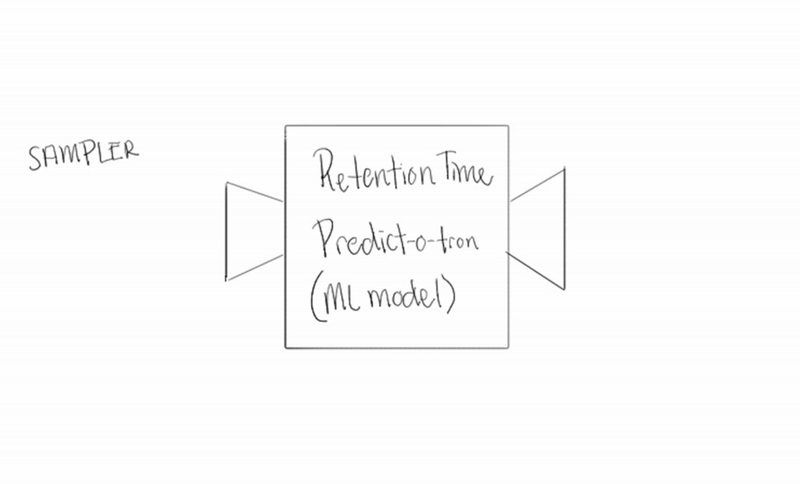

In proteomics, there are lots of [uses for machine learning (**ML**)](https://analyticalsciencejournals.onlinelibrary.wiley.com/doi/full/10.1002/pmic.201900335 ). Any piece of data can be predicted.  
* Given a peptide sequence, predict the LC retention time
* Given a peptide sequence, predict the MS/MS spectrum
* Given a protein sequence, predict the peptides that will be observed
* Given the abundance of `protein_x`, predict the abundance of `protein_y`
* Given a drug used to treat cells, predict the abundances of all proteins


(And the list could continue forever.)

In practice, there are a few classic learning tasks that many people have pursued. These include retention time prediction and also MS/MS spectrum prediction. The input for both of these is a peptide sequence.

This notebook will cover several different methods of embedding. The first methods is very simple; subsequent methods get increasingly complex.


In [2]:
# Sample of peptide sequences
peptide_seqs = [
  "CGDILGVTSK",
  "SKVPAFVR",
  "ISEIEDAAFLAR",
  "DCGEWAIPGGMVDPGEK",
  "EVPVPTPAPVEVPVPER",
  "TLPADVQNYYSR",
  "LNVTEQEKIDKLMIEMDGTENK",
  "THSQGGYGSQGYKYNWK",
  "SHWAELEISGR",
  "EKITAFVVER",
  "LEVDYSIGRDIQR",
  "AGMTHIVREVDRPGSK",
  "SAMPLER",
  "RAMPLES"
]


# Simple peptide embeddings

## Level 1: A single number
The simplest way to embed a peptide is with a **single number**. This might be a number like the pI [(isoelectric point)](https://en.wikipedia.org/wiki/Isoelectric_point) of the peptide. In the code block below, we convert a list of peptides into a list of their pI. This is an embedding!

In [3]:
### Here's some code to convert to an amino acid sequence to a single number by
### just doing an average pI.
!pip install peptides --quiet
import peptides

for seq in peptide_seqs:
  pep = peptides.Peptide(seq)             #Load sequece as a Peptide object
  pi = pep.isoelectric_point("EMBOSS")    #Calculate the pI of the sequence
  print(f"{seq:<40} pI: {pi:.2f}")

CGDILGVTSK                               pI: 6.16
SKVPAFVR                                 pI: 11.65
ISEIEDAAFLAR                             pI: 3.93
DCGEWAIPGGMVDPGEK                        pI: 3.74
EVPVPTPAPVEVPVPER                        pI: 3.98
TLPADVQNYYSR                             pI: 6.33
LNVTEQEKIDKLMIEMDGTENK                   pI: 4.10
THSQGGYGSQGYKYNWK                        pI: 9.74
SHWAELEISGR                              pI: 5.49
EKITAFVVER                               pI: 6.53
LEVDYSIGRDIQR                            pI: 4.37
AGMTHIVREVDRPGSK                         pI: 9.69
SAMPLER                                  pI: 6.41
RAMPLES                                  pI: 6.41



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


This is a very simplistic embedding, which makes it easy to demonstrate. If you had a spreadsheet of peptides and their LC time, you could add a new column into that spreadsheet for the peptide's embedded value (the pI). Then you could use an ML wrapper like [scikit-learn](https://scikit-learn.org/) to train a model that predicts peptide LC retention time.


---

**Pause and think:** This method seems pretty simple, but it turns out that it's not too useful for ML. Why not?  What are its limitations?

In [ ]:
# Record your thoughts here, then "Click to reveal" the answer.

<details>
<summary>Click to reveal</summary>

This embedding assumes that a single number represents all of the information that we might need. Some of the problems that exist with this is that *it removes information about sequence composition and sequence order.* Both of these are pretty important for tasks like MS/MS spectrum prediction. So for Level 2, we will do something a bit better.

</details>

---

## Level 2: An array

We learned from level 1 that **it would be best to include more information about a peptide than a single number.** In level 2, we will use an **array** of numbers to represent the peptide. Our example for this level will be the **fractional composition** idea that was described by the PNNL group in 2003 [@petritis_use_2003]. The goal of this method is to **show which *amino acids* are present** in the peptide.


In the paper they describe the first step of their method as follows:

> Each peptide was coded as a 20-dimensional vector consisting of the normalized number of each of the 20 amino acid residues making up the peptides.

In [ ]:
import numpy as np
import pandas as pd

amino_acids = "ACDEFGHIKLMNPQRSTVWY"  # Standard 20 amino acids-- the "20 dimensions" mentioned in the paper

# Encode peptide sequence into an array
def array_encode_peptide(peptide, amino_acids = amino_acids):
    aa_to_index = {aa: i for i, aa in enumerate(amino_acids)}
    # Initialize your matrix
    encoded_matrix = np.zeros(len(aa_to_index))
    # Count each instance of each amino acid
    for aa in peptide:
        if aa in aa_to_index:
            encoded_matrix[aa_to_index[aa]] += 1
    return encoded_matrix

##########################################################

encoded_sequences = []

for sequence in peptide_seqs:
    encoded_sequence = array_encode_peptide(sequence)
    encoded_sequences.append(encoded_sequence)

df = pd.DataFrame(encoded_sequences, columns=list(amino_acids), index=peptide_seqs)
df = round(df / df.max(),2)
df


,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
CGDILGVTSK,0.00,1.0,0.5,0.00,0.0,0.50,0.0,0.5,0.33,0.5,0.0,0.0,0.00,0.0,0.0,0.5,0.5,0.2,0.0,0.00
SKVPAFVR,0.33,0.0,0.0,0.00,1.0,0.00,0.0,0.0,0.33,0.0,0.0,0.0,0.17,0.0,0.5,0.5,0.0,0.4,0.0,0.00
ISEIEDAAFLAR,1.00,0.0,0.5,0.50,1.0,0.00,0.0,1.0,0.00,0.5,0.0,0.0,0.00,0.0,0.5,0.5,0.0,0.0,0.0,0.00
DCGEWAIPGGMVDPGEK,0.33,1.0,1.0,0.50,0.0,1.00,0.0,0.5,0.33,0.0,0.5,0.0,0.33,0.0,0.0,0.0,0.0,0.2,1.0,0.00
EVPVPTPAPVEVPVPER,0.33,0.0,0.0,0.75,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,1.00,0.0,0.5,0.0,0.5,1.0,0.0,0.00
TLPADVQNYYSR,0.33,0.0,0.5,0.00,0.0,0.00,0.0,0.0,0.00,0.5,0.0,0.5,0.17,0.5,0.5,0.5,0.5,0.2,0.0,0.67
LNVTEQEKIDKLMIEMDGTENK,0.00,0.0,1.0,1.00,0.0,0.25,0.0,1.0,1.00,1.0,1.0,1.0,0.00,0.5,0.0,0.0,1.0,0.2,0.0,0.00
THSQGGYGSQGYKYNWK,0.00,0.0,0.0,0.00,0.0,1.00,1.0,0.0,0.67,0.0,0.0,0.5,0.00,1.0,0.0,1.0,0.5,0.0,1.0,1.00
SHWAELEISGR,0.33,0.0,0.0,0.50,0.0,0.25,1.0,0.5,0.00,0.5,0.0,0.0,0.00,0.0,0.5,1.0,0.0,0.0,1.0,0.00
EKITAFVVER,0.33,0.0,0.0,0.50,1.0,0.00,0.0,0.5,0.33,0.0,0.0,0.0,0.00,0.0,0.5,0.0,0.5,0.4,0.0,0.00


Here, **each row represents an embedding** for its given peptide.



---

**Pause and think:** What are some pros to using this method compared to method 1? What are some of the limitations?

In [ ]:
# Record your thoughts here, then "Click to reveal" the answer.

<details>
<summary>Click to reveal</summary>
This method is better than using pI since we are now able to see the general makeup of each peptide. However, *it still lacks positional information.* Without positional information, the embedding would be identical for peptides: `SAMPLER`, `RAMPLES`, and `AELMPRS`.
</details>



---



## Level 3: A one-hot matrix
One of the most common emeddings used in ML used to turn a sequence of letters into a machine-readable format is the **one-hot encoding** method.

You have likely used this encoding before-- perhaps when filling out your name or student ID on a  **[scan-tron](https://academictechnologies.unt.edu/sites/academictechnologies.unt.edu/files/academictechnologies/scantron_88483.pdf)** for a standardized test! In this encoding we create a matrix where one dimension represents the lenth of the sequence (e.g. your name), and the second represents the size of the alphabet. If your name is `John`, you would bubble in the `J` in one column, followed by `O`, `H`, and `N` in the subsequent columns.


**Experiment:** *What's the one-hot encoding for your name?*

[TODO] Find an alternative for the interactive bubble name tool in Javascript.


In proteomics, instead of encoding a name, we use the one-hot matrix to represent the **positional encoding of amino acids** in a peptide. Rather than "bubbling in" letters, we assign a `1` to the position of the corresponding amino acid in the sequence, leaving the rest as `0`.





---



**Pause and think:** You may have noticed that if your name was less than 10 letters long, the rest of the rows were filled with `0`'s. This may have seemed like extra information, but it is surprisingly important.
*Can you think of why this is useful for ML?*

In [ ]:
# Record your thoughts here, then "Click to reveal" the answer.

<details>
<summary>Click to reveal</summary>
<p>Machine learning models typically require <i>all inputs to have the same dimensions</i>. If we had two sequences of different lengths, their one-hot encoded matrices would also have different dimensions, making training difficult.</p>
<p>A common solution to this problem is <i>padding</i>. This means setting a fixed minimum length (e.g., <code>10</code>) and filling any remaining space with <code>0</code>'s.</p>
</details>


---

**Code Challenge:** Program a one-hot encoding function.

In the cell below, write a one-hot encoding function for sequences `SAMPLER` and `SKVPAFVSR`.

**Use padding** to make sure that their matrices have the **same dimensions**.

In [ ]:
import pprint
amino_acids = "ACDEFGHIKLMNPQRSTVWY"  # Standard 20 amino acids
aa_to_index = {aa: i for i, aa in enumerate(amino_acids)}

def one_hot_encode_peptide(sequence):
    ############################################
    # Write your code here to do the one-hot encoding
    ...



    ############################################


# Create two one-hot matrices for the two peptides in `sequences`.
sequences = ["SAMPLER", "SKVPAFVSR"]
for sequence in sequences:
    one_hot = one_hot_encode_peptide(sequence)
    if one_hot:
        print(f'{sequence}:')
        print(f'  {", ".join(amino_acids)}')
        pprint.pprint(one_hot_encode_peptide(sequence))

<details>
<summary>Click to reveal the solution</summary>

```python
def one_hot_encode_peptide(sequence):
    pad_length = 10
    one_hot = []
    for amino_acid in sequence:
        current_row = [0]*len(amino_acids) # for each row initialize each element as 0
        amino_acid_pos = amino_acids.index(amino_acid)
        current_row[amino_acid_pos] = 1
        one_hot.append(current_row)

    # Pad the rows that aren't used with 0s
    # so that both are 20x10 matrices.
    for i in range(len(sequence), pad_length):
        one_hot.append([0]*len(amino_acids))

    return one_hot

```

Note that there are easier ways to do this in Python, such as using the `numpy` library.

</details>

---

This encoding solves both of the problems of our level 1 and level 2 methods. We now keep track of the amino acid composition *and* the amino acid 
order.

---

**Pause and think:** One challenge with this one-hot embedding is that we restrict ourself to the twenty amino acids... But what if we wanted to train on data that included a modified peptide (essentially a brand new amino acid, not in the twenty canonical ones)? *Can you think of a way to encode a peptide sequence with modified amino acids? (e.g. S[Phosphorylation]AMPLER)*

We will continue from here in part 2 of the notebook!

---


# Wrap up

In this lesson, **we learned about three ways to transform a peptide sequence into numeric representations— embeddings.**

1. **Single-Number Embedding**
    
    * *Concept:* We reduce an entire peptide to **one numerical property** (e.g., its pI).
    * *Pros:* Extremely fast/simple to compute and easy to interpret.
    * *Cons:* No way to keep track of **order/position information**.

2. **Fractional Amino Acid Composition (AAC)**
    
    * *Concept:* Represents the **frequency** of each of the 20 amino acids in a peptide.
    * *Pros:* Tells us more about what amino acids make up the peptide. Gives us more information than a single number.
    * *Cons:* No way to keep track of **order/position information**.

3. **One-Hot Matrix**
    
    * *Concept:* A 2D matrix where rows represent **sequence positions** and columns represent the **amino acid alphabet**. A 1 indicates the presence of a specific amino acid at a specific position.
    * *Pros:* Tells us **both composition and order** of amino acids.
    * *Cons:* Limited to **standard amino acids** unless we add a new column for each peptide modification we encounter.


In Part 2, we’ll explore more advanced embeddings that combine multiple approaches and allow us to represent modified peptides and post-translational modifications.